### Problem Statement:

This project aims to build a deep learning model for the classification of handwritten Chinese numerals. Using the Chinese MNIST dataset, which consists of 15,000 grayscale images of size 64x64 pixels representing 15 unique Chinese numeral classes, the objective is to accurately map 15 numeric symbol to its corresponding class label.

This project will leverage Convolutional Neural Networks (CNNs) to achieve efficient and accurate multiclass classification of the handwritten Chinese numeral images. The trained model will have practical applications in areas such as document digitization, educational platforms, and automated handwriting recognition systems.

Chosen Library:

* TensorFlow/Keras: This library provides:
* A streamlined API for constructing and training CNN models.
* Integrated GPU/TPU support for accelerated computation.
* Comprehensive visualization tools for performance analysis.

### Step 1:
#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device using:", device)

Device using: cuda


### Step 2: 
#### Load & Preprocess Data

In [2]:
data = pd.read_csv("/kaggle/input/chinese-mnist-digit-recognizer/chineseMNIST.csv")
display(data)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八


In [3]:
print(f"Characters: {data.character.nunique()}: {list(data.character.unique())}")
print()
print(f"Numbers: {data.label.nunique()}: {list(data.label.unique())}")

Characters: 15: ['九', '十', '百', '千', '万', '亿', '零', '一', '二', '三', '四', '五', '六', '七', '八']

Numbers: 15: [9, 10, 100, 1000, 10000, 100000000, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [4]:
X = data.iloc[:, :-2].values
y = data['label'].values

num_classes = 10
y[y >= num_classes] = num_classes - 1

X = X / 255.0

X = X.reshape(-1, 64, 64, 1)

y = to_categorical(y, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3:
#### Visualise Data

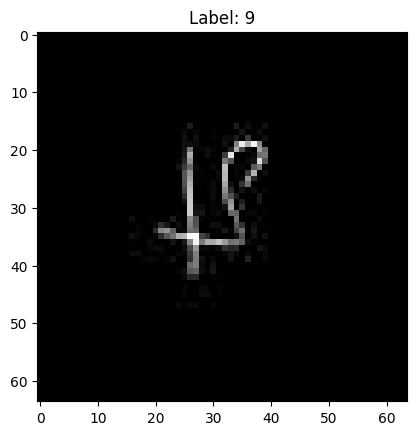

In [5]:
def plot_sample(index):
    image = np.flipud(X_train[index].reshape(64, 64))
    plt.imshow(image, cmap='gray')
    label = np.argmax(y_train[index]) if len(y_train[index].shape) > 0 else y_train[index]
    
    plt.title(f"Label: {label}")
    plt.show()

# Visualise a sample
plot_sample(4)

### Step 4:
#### Build a CNN Model

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

display(model)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

### Step 5:
#### Compile Model

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Step 6:
#### Train Model

In [8]:
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr  # Keep learning rate the same for the first 5 epochs
    else:
        return lr * 0.1  # Reduce the learning rate by a factor of 0.1 after epoch 5

lr_callback = LearningRateScheduler(lr_schedule)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5524 - loss: 1.4020 - val_accuracy: 0.8983 - val_loss: 0.3311
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8621 - loss: 0.3952 - val_accuracy: 0.9277 - val_loss: 0.2090
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9040 - loss: 0.2600 - val_accuracy: 0.9473 - val_loss: 0.1560
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9266 - loss: 0.2106 - val_accuracy: 0.9640 - val_loss: 0.1169
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9410 - loss: 0.1611 - val_accuracy: 0.9603 - val_loss: 0.1183
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9458 - loss: 0.1481 - val_accuracy: 0.9640 - val_loss: 0.1141
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9546 - loss: 0.1306 - val_accuracy: 0.9647 - val_loss: 0.1046
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9634 - loss: 0.1060 - val_accuracy: 0.

### Step 7:
#### Evaluate Model

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}\nTest Accuracy: {accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9770 - loss: 0.0836
Test Loss: 0.07533564418554306
Test Accuracy: 0.9763333201408386


### Step 8:
#### Visualise Test Results

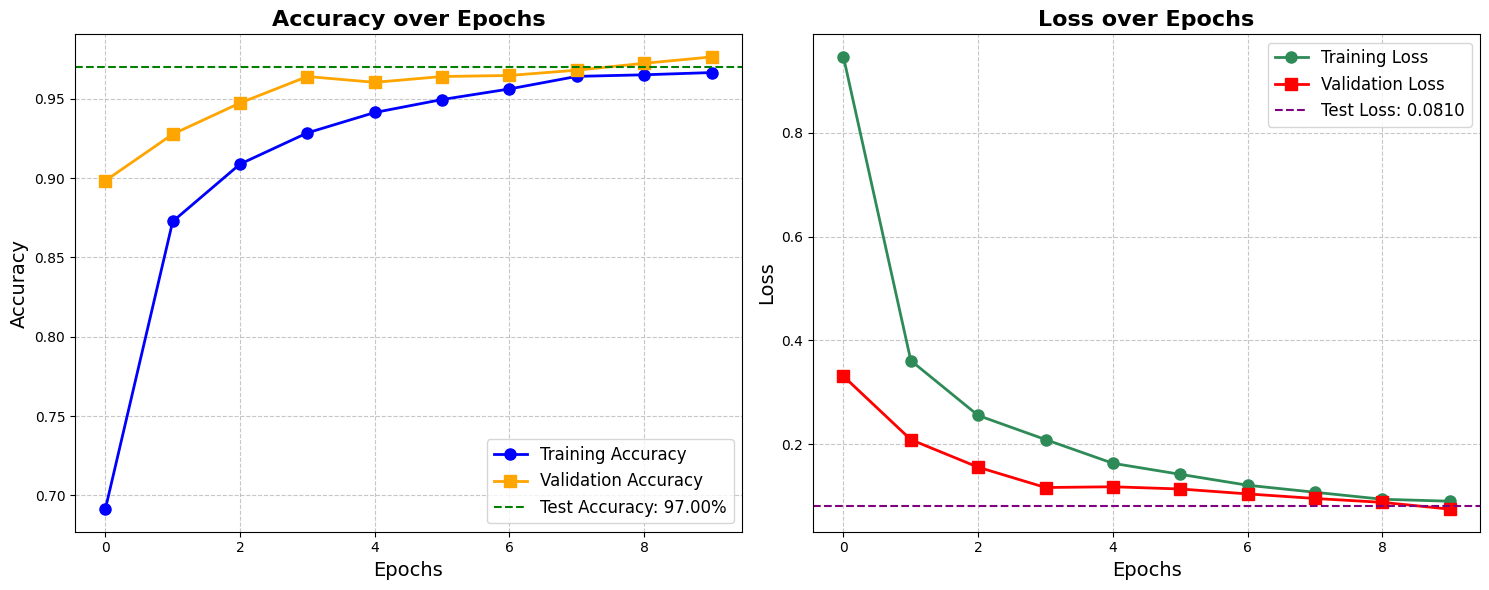

In [10]:
history = history.history

test_loss = 0.081
test_accuracy = 0.97

plt.figure(figsize=(15, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy', color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2, marker='s', markersize=8)
plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f'Test Accuracy: {test_accuracy*100:.2f}%')
plt.title('Accuracy over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss', color='seagreen', linewidth=2, marker='o', markersize=8)
plt.plot(history['val_loss'], label='Validation Loss', color='red', linewidth=2, marker='s', markersize=8)
plt.axhline(y=test_loss, color='purple', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
plt.title('Loss over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

### Step 9:
#### Make Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


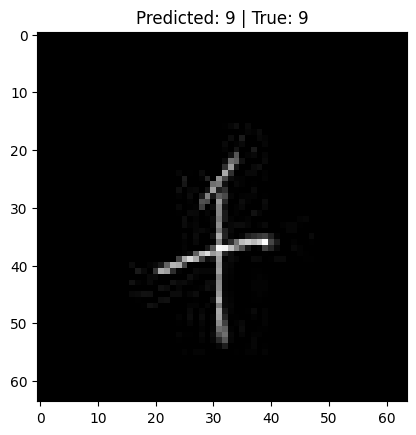

In [11]:
def predict_sample(index):
    prediction=model.predict(X_test[index].reshape(1, 64, 64, 1))
    plt.imshow(X_test[index].reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {np.argmax(prediction)} | True: {np.argmax(y_test[index])}")
    plt.show()

predict_sample(7)

### Conclusion Summary:


To evaluate the performance of the trained model, we take the 3rd sample (index 2) from the test dataset (X_test). This sample is passed through the model for prediction. The model generates a predicted label based on the image.

We then display the image alongside the predicted label and true label (actual value) as the title of the plot. This allows us to visually compare how accurately the model predicted the label for this specific test image.

By using this approach, we can assess the model’s performance on individual test samples, providing insight into its accuracy and ability to generalize to unseen data.